# 3D Printing of Mathematical Art

Jiayin Lu, Jan 2023, Jan 2023 mini-course

## Learning goals:
 - Intro to 3D printing
 - Try out some useful design tools: Mathematica, Blender, Inkscape

## Artistic goal: 
  - Make a few models, and you may print them out yourself later.
  
        -- Tea light holder
             1. top piece: regular polygon shape with wireframe (Mathematica)
             2. bottom piece: wavy bottom with pattern (Mathematica)
             
        -- 2D designs to 3D
             1. Year of the Rabbit 2023! (Inkscape)
             2. Rose design (Python)
         

## 1. 3D printing

https://en.wikipedia.org/wiki/3D_printing : 3D printing or additive manufacturing is the construction of a three-dimensional object from a CAD model or a digital 3D model. 

## 1.1. 3D printer and how it works: 

Let's look at a video: https://www.youtube.com/watch?v=FqQAjkZOBeY

Traditional 3D printer: 
- The 3D model is printed layer by layer.
- At each layer: the printer melts some plastic filaments (usually PLA, ABS) at high temperature at the nozzle. The nozzle then deposits the melted plastic at a fine resolution (milimeter). Once the hot melted plastic touches the layer surface, it cools down immediately, and becomes solid again in the location. 
- Layer by layer, we get our final shape of the 3D model. 

## 1.2. Representation of 3D models:

3D mesh to represent the surface: the famous Stanford Bunny:

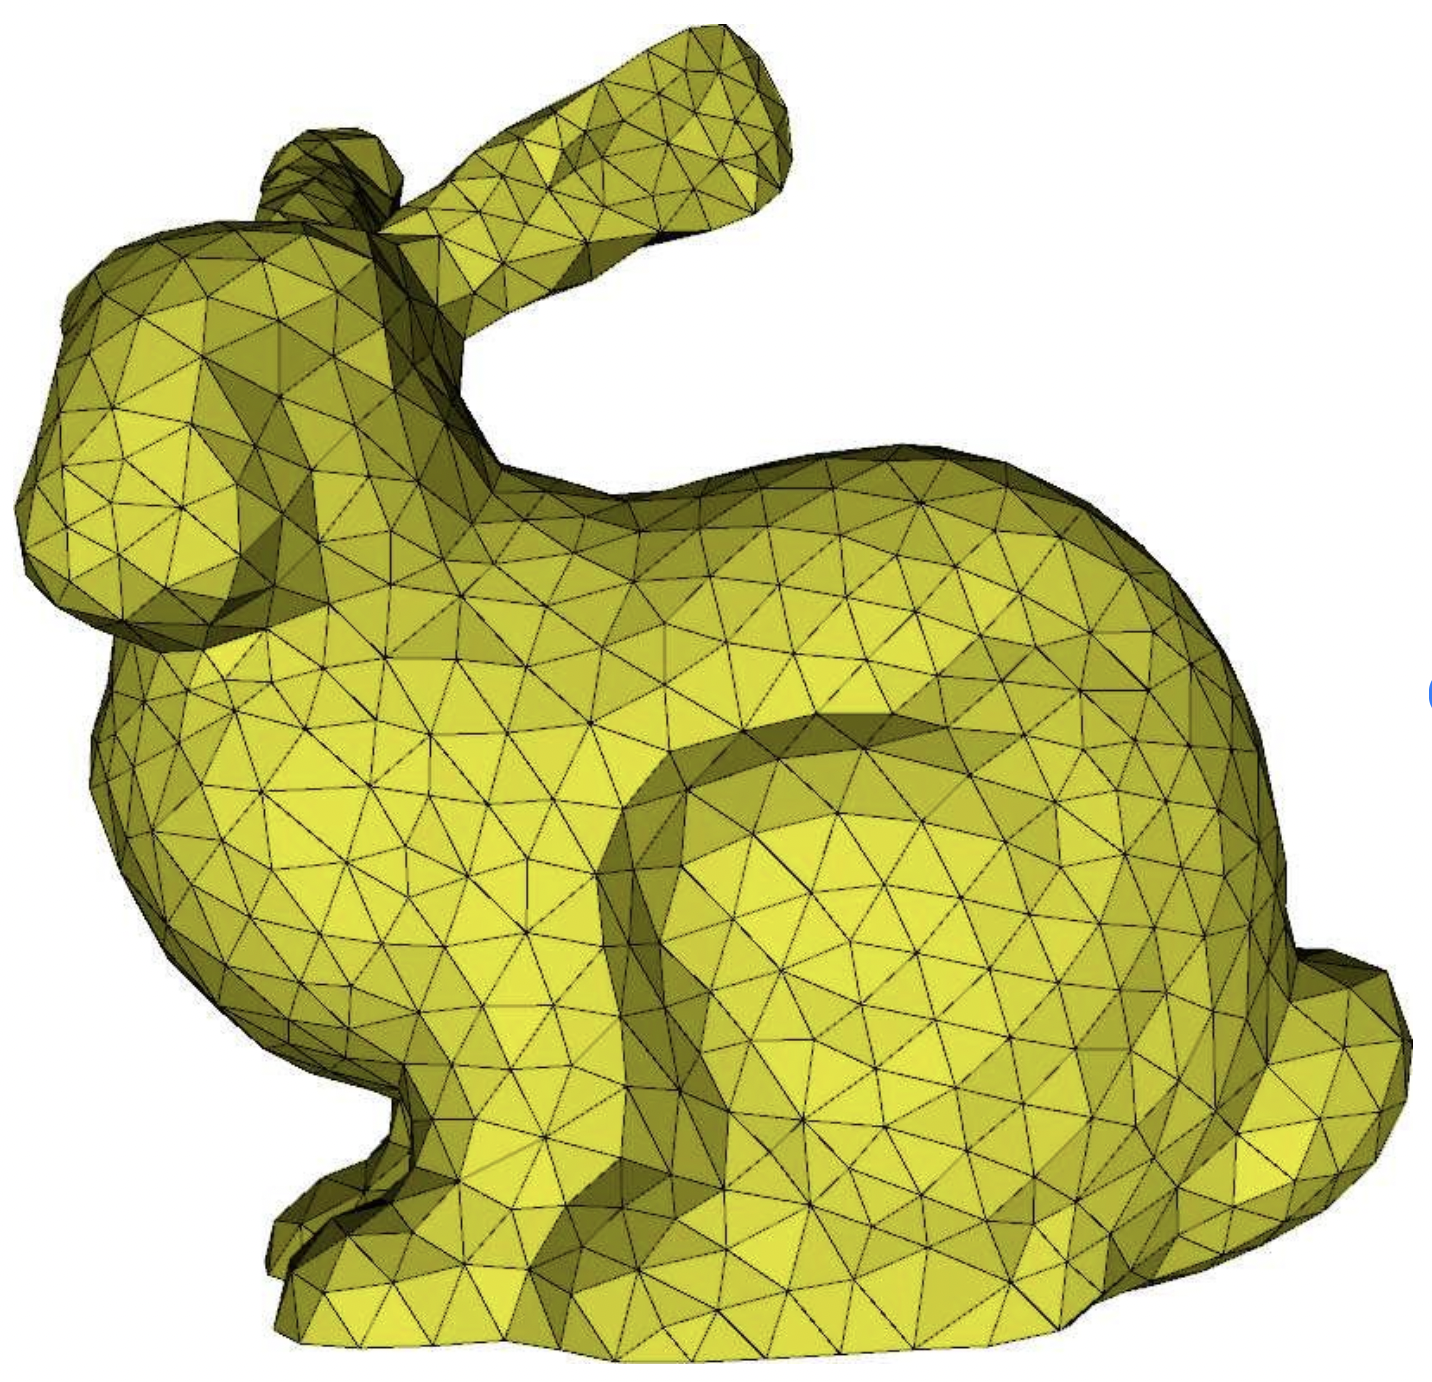

The mesh info can be saved in .STL file, which stores each triangle's:
 - vertex indices
 - vertex coordinates
 - triangle face normals (orientation: which side is inside of shape, which side is facing outside of shape)

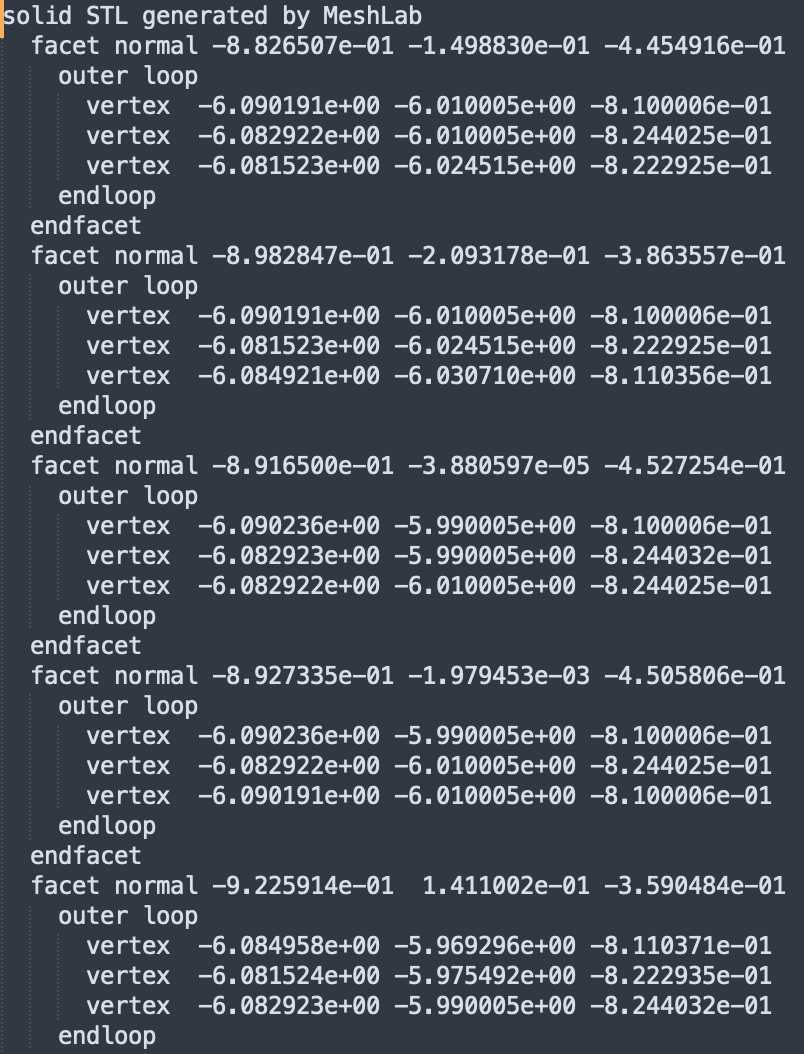

## 1.3. Convert 3D model to machine code G-code: 

The 3D printer reads G-code, which are instructions on how to print each layer of the model. 

First video: https://www.youtube.com/watch?v=2TByiMNduss

Second video: https://www.youtube.com/watch?v=weyQViiTMVE

You can use Slic3r for your own G-code generation and preview. 
When you import your 3D STL model into a 3D pinter computer, the 3D printer's software will convert your model to G-code too, and you will be able to preview the printing on the computer interface. 

Let's jump straight into making our models, and I will introuce some useful tools along the way. 

## Model A: Tea light holder

Preview of sample final result!

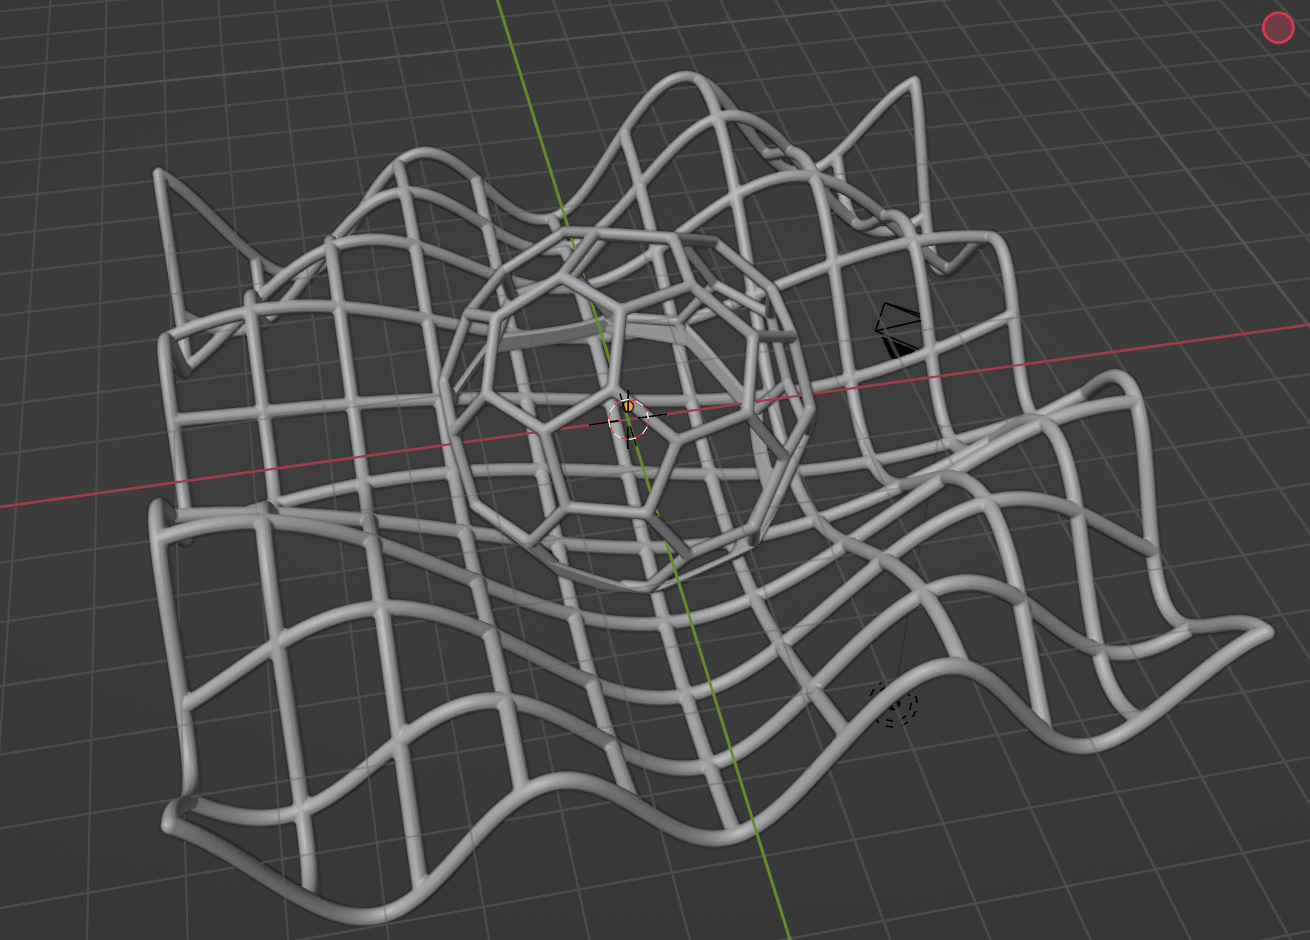

1. First, let's use Mathematica to make our basic shapes of the top and bottom pieces. Please open "lamp_pieces_model.nb" and follow along. In the end, we will have generated four "STL" format files, which we will use for model editing later. 

2. Secondly, let's open Blender. Now, we will import our four STL files into Blender. Please follow along for the editing. Some useful tips: 
- "Object" mode for adding modifiers to meshes. For our purpose, the modifiers most useful are: Remesh (Voxel), Boolean. 
- If we have loose parts after Boolean Difference operations, we need to go to "Edit" mode, then "Mesh->Separate by Loose parts" to make them into different objects. 
- Eventually, we will export our final model as "STL" file. 

3. Lastly, we will use MeshLab to simplify our models (Reduce their triangle meshes for a smaller file size). Tip:
-  We can use "Filters -> Remeshing, Simplification and Reconstruction -> Simplification: Quadric Edge Collapse Decimation", we can input "Percentage reduction: 0.9", so in each application, the resulting number of triangle faces would be $n_{k+1}=0.9n_k$. Let's also select "Preserve boundary of the mesh". Then we will do a few applications of the reduction. 

## Model B: Year of the Rabbit 2023!

Preview of sample final result!

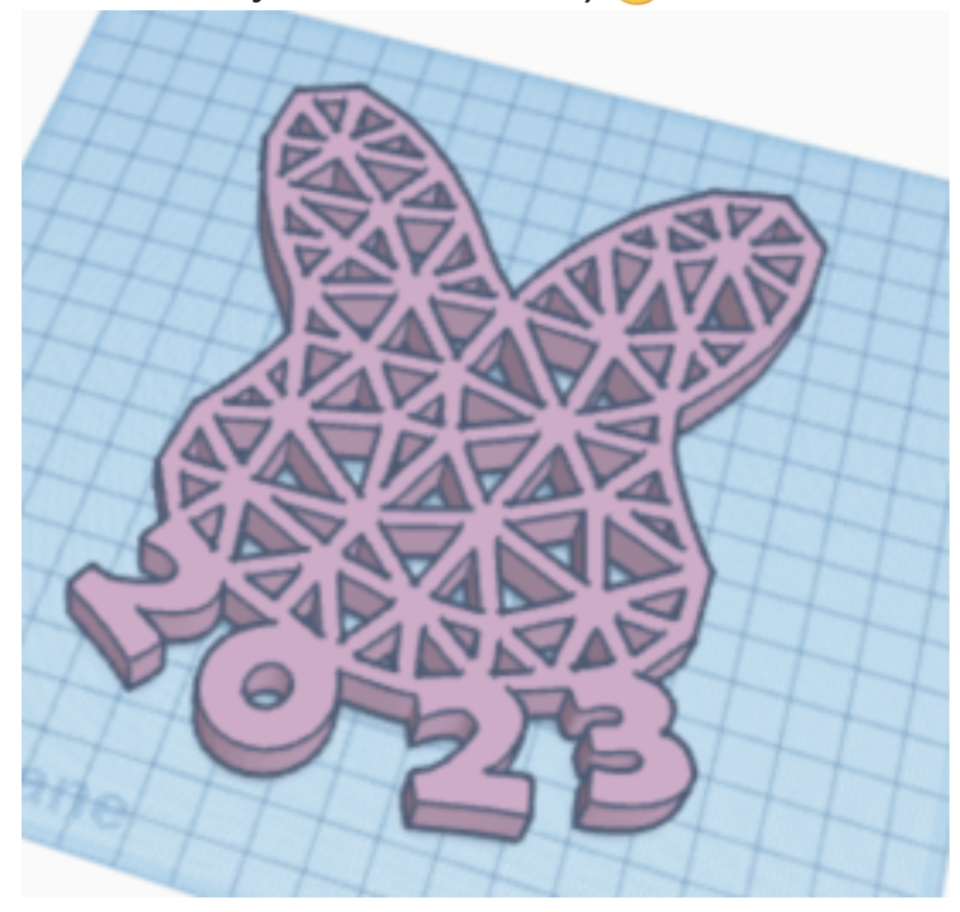

### Inkscape creating 2D vectorized design (.svg)

1. First, let's open Inkscape and copy+paste the "rabbit_image" into Inkscape. 

2. Secondly, let's vectorize the image by applying the "Trace bitmap" tool.

3. Thirdly, let's create a circle object for our generator points. We can do "Extensions -> Generate from Path -> Scatter", and input "spcae between copies" 7 to 10. Select "Live preview". We want the shape boundary points to capture the rough features of the shape, but not too dense - so after adding thickness to the line, it is suitable for 3D printing. 

4. Next, let's randomly place ~20-25 inner points inside the bunny shape. 

5. Then, we can select these points, and do "Extensions -> Generate from path -> Voronoi diagram", and choose "Type of diagram: Delaunay triangulation" and "Triangle color: Default". Let's also select "live preview".

6. Now, let's move our triangulation to another empty space (separated from the generator points). Then, we can overlay our original bunny vectorized image onto the triangulation. We can then delete triangles outside of the shape. 

7. Lastly, let's group the resulting triangles as our triangulation. We can also do some final editing, like adding the "2023" text. Eventually, we can "group" our final designs, and output using "File -> Export -> Selection -> Export Selected Only -> Plain SVG(*.svg)".

### Blender adding thickness to 2D design for 3D mesh model (.STL)

- Import .SVG, quick key: "S" scaling, "G" move it around, "G", then "x" move along x axis; similarly for "y", "z".
- Object mode: Object-> Convert -> Mesh.
- Edit mode: "Select ->All", quick key "e" then move your mouse for desired thickness. click mouse to confirm. 
- Export mesh as STL.

## Model C: Rose 

Rose: https://en.wikipedia.org/wiki/Rose_(mathematics)

Play around the Rose code and make your own rose! You can play around Python and Inkscape for your 2D Rose design. And then use the previous procedure: Save your design as PNG, import to Inscape for editing, save as .SVG and use Blender to convert the 2D vector image (.SVG) to 3D printable mesh (.STL).

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
#Choose your n and d parameters
n=7.0
d=6.0

In [49]:
#Rose curve in polar coordinates
k=n/d
delta=np.linspace(0,d*2*np.pi,1000)
r=np.sin(k*delta)

(0.0, 6.283185307179586, 0.0, 1.0499987020200272)

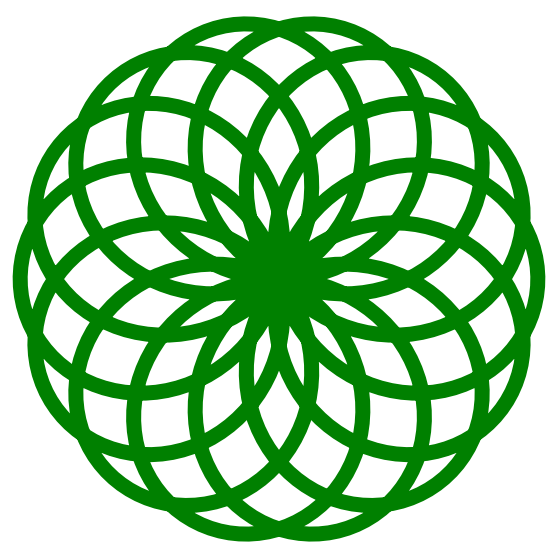

In [51]:
#Plot the curve
#Note that plt.polar function does not plot r<=0 values
#So we can manually add pi when r<0 (i.e. reflect across the origin), and replace r with abs(r).
#Reference: https://stackoverflow.com/questions/67989467/plotting-rose-curve-in-python-with-even-petals
#Customize your line width, etc, and export to image.
plt.figure(figsize=(10,10))
plt.polar(delta+(r<0)*np.pi, np.abs(r), 'g-', linewidth=15)
plt.axis("off")

## 3. Other info

Some printing resources:
- Harvard students have free access to SEAS MakerSpace. Once through a training session you will have swipe access 7am-12am. 
- shapeways.com

More to explore: 
- a powerful mesh manipulation/editing tool: MeshMixer, only available for Windows.
- Other useful modeling tools: tinkercad.com, Fusion 360, Rhino, OpenSCAD, SketchUp, etc


## ~ Thank you ~